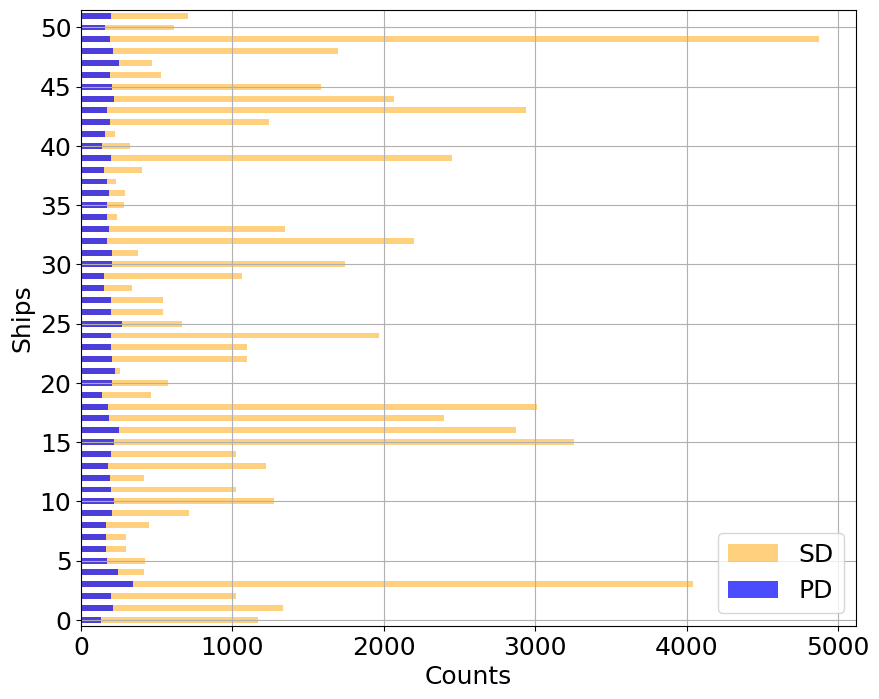

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 전체 글꼴 크기 설정
plt.rcParams.update({'font.size': 18})

# CSV 파일 읽기
df = pd.read_csv('raw_data.csv')

# ships_idx 별 전체 갯수 계산
total_counts = df['ships_idx'].value_counts().sort_index()

# ships_idx 별 MDM=True 인 갯수 계산
mdm_true_counts = df[df['MDM'] == True]['ships_idx'].value_counts().sort_index()

# 데이터프레임으로 합치기
summary_df = pd.DataFrame({
    'SD': total_counts,
    'PD': mdm_true_counts
}).fillna(0)  # NaN 값을 0으로 대체

# 시각화
fig, ax = plt.subplots(figsize=(10, 8))

# Total Counts 먼저 그리기
summary_df['SD'].plot(kind='barh', ax=ax, color='orange', alpha=0.5, label='SD')

# MDM=True Counts를 그 위에 겹쳐서 그리기
summary_df['PD'].plot(kind='barh', ax=ax, color='blue', alpha=0.7, label='PD')

# y축 라벨 설정 (5 단위로만 표시)
y_labels = ax.get_yticks()
ax.set_yticks(np.arange(min(y_labels), max(y_labels)+1, 5))
ax.set_yticklabels([int(label) for label in np.arange(min(y_labels), max(y_labels)+1, 5)])

# 그리드 추가
ax.grid(True)

# 범례와 제목 설정
plt.legend(prop={'size': 18})  # 레전드 글꼴 크기 설정
plt.xlabel('Counts')
plt.ylabel('Ships')
plt.show()
